In [1]:
import pandas as pd
import datetime

In [2]:
df = pd.read_csv("../gateio_data/minutely_data/ETH_minutely_rets.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['minute'] = df['timestamp'].dt.minute
df['hour'] = df['timestamp'].dt.hour

In [3]:
long = df[(df['minute']== 0) & (df['hour']== 0)].set_index('timestamp')['vwap']
short = df[((df['minute'] == 1)|(df['minute'] == 2)) & (df['hour']== 0)].set_index('timestamp')['vwap']

<AxesSubplot:xlabel='timestamp'>

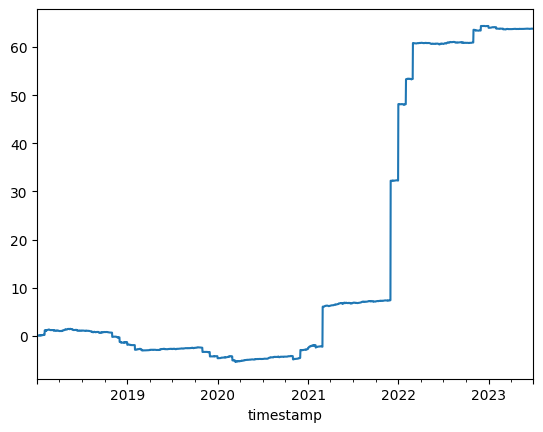

In [4]:
pd.concat([long, -short]).resample('d').sum().cumsum().plot()

AxesSubplot(0.125,0.2;0.775x0.68)


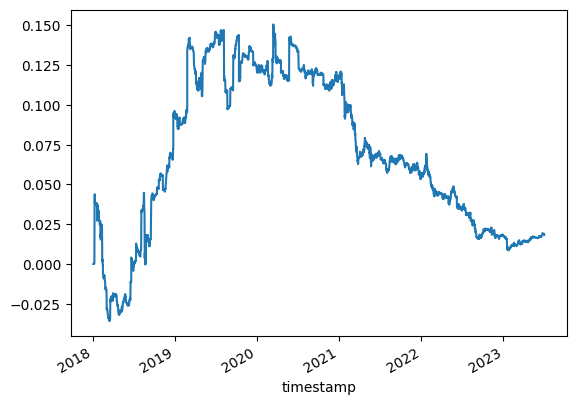

In [8]:
print(short.cumsum().plot())